In [1]:
# Step 1: Variable Identification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import zscore

# Column names as per the dataset documentation
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
health_data = pd.read_csv(url, names=columns)

# Replace '?' with NaN
health_data.replace('?', pd.NA, inplace=True)

# Convert appropriate columns to numeric
health_data = health_data.apply(pd.to_numeric)

print("Variable Identification:")
print(health_data.head())
print(health_data.info())

Variable Identification:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    f


Univariate Analysis:


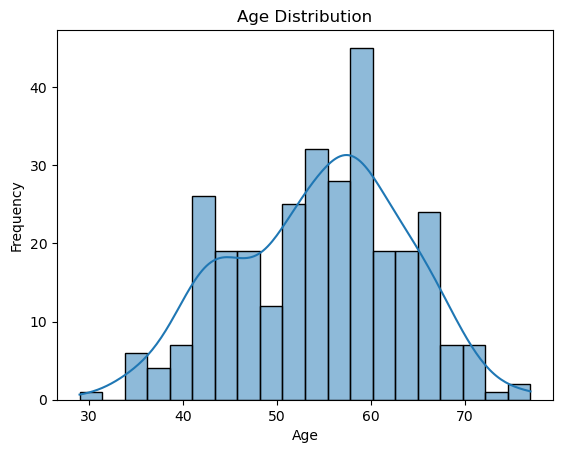

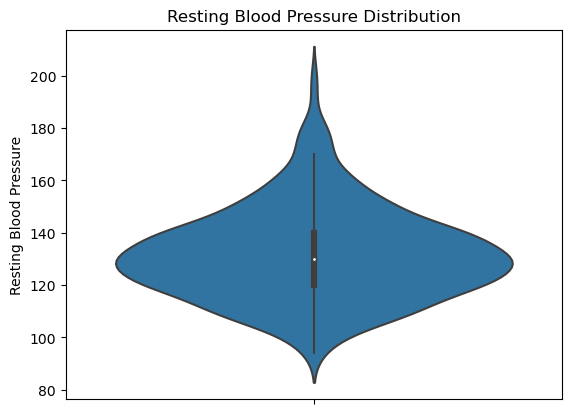

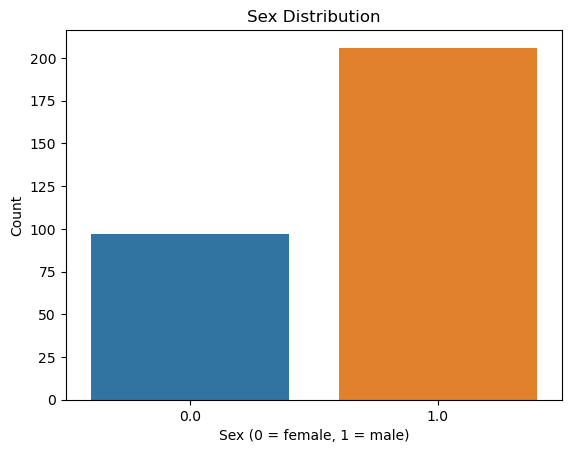

In [2]:
# Step 2: Univariate Analysis
print("\nUnivariate Analysis:")
sns.histplot(health_data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('images/age_distribution.png')
plt.show()

sns.violinplot(y=health_data['trestbps'])
plt.title('Resting Blood Pressure Distribution')
plt.ylabel('Resting Blood Pressure')
plt.savefig('images/trestbps_distribution.png')
plt.show()

sns.countplot(x=health_data['sex'])
plt.title('Sex Distribution')
plt.xlabel('Sex (0 = female, 1 = male)')
plt.ylabel('Count')
plt.savefig('images/sex_distribution.png')
plt.show()


Bivariate Analysis:


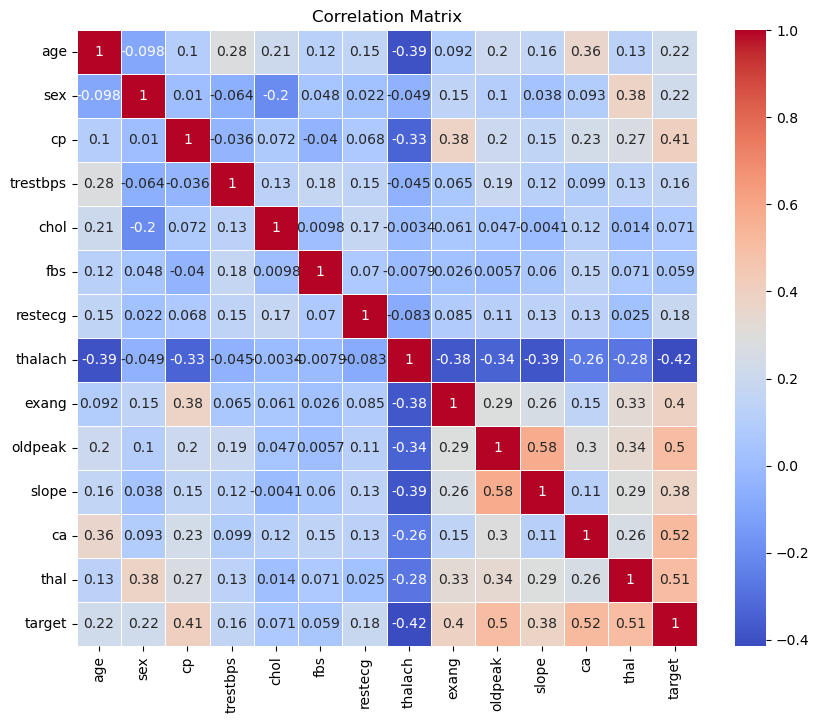

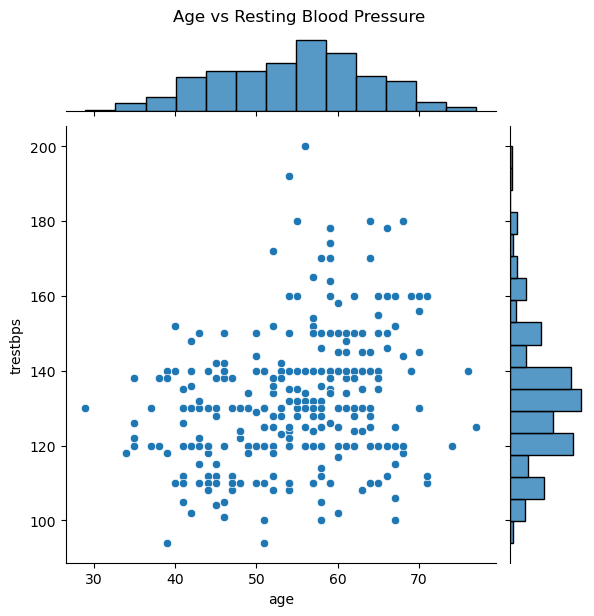

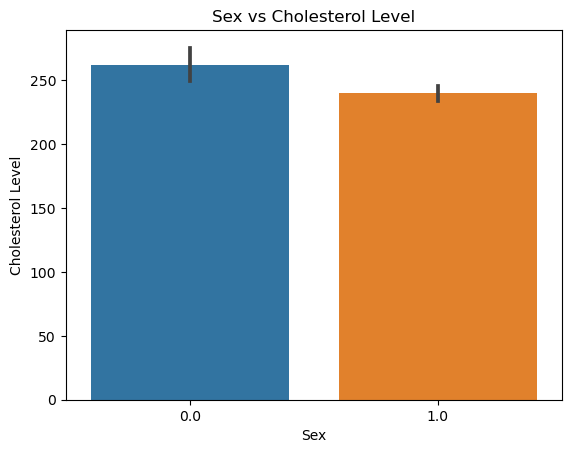

C:\Users\khull\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


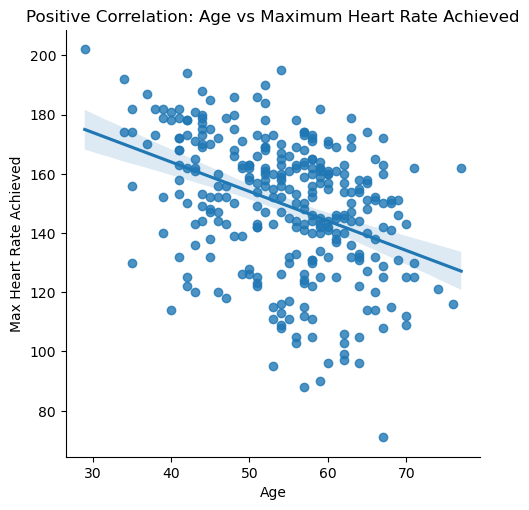

C:\Users\khull\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


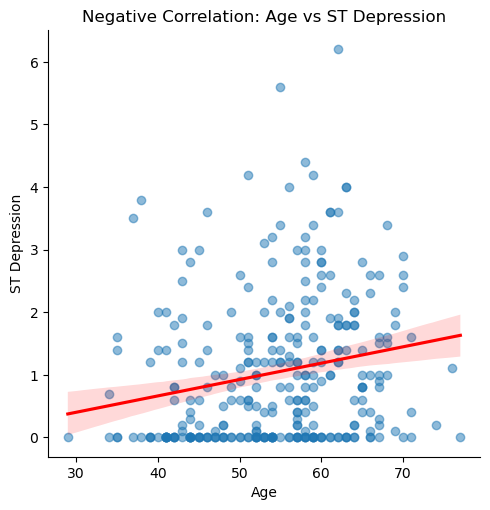

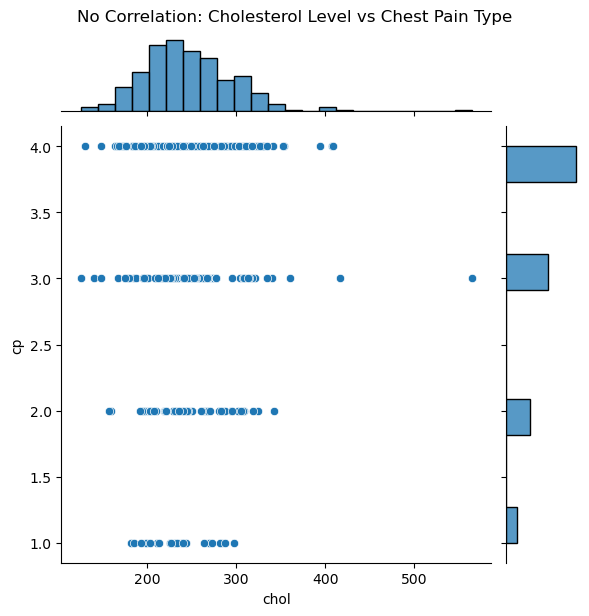

In [3]:
# Step 3: Bivariate Analysis
print("\nBivariate Analysis:")
correlation_matrix = health_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig('images/correlation_matrix.png')
plt.show()

sns.jointplot(x='age', y='trestbps', data=health_data, kind='scatter')
plt.suptitle('Age vs Resting Blood Pressure', y=1.02)
plt.savefig('images/age_vs_trestbps.png')
plt.show()

sns.barplot(x='sex', y='chol', data=health_data)
plt.title('Sex vs Cholesterol Level')
plt.xlabel('Sex')
plt.ylabel('Cholesterol Level')
plt.savefig('images/sex_vs_chol.png')
plt.show()

# Positive Correlation
sns.lmplot(x='age', y='thalach', data=health_data)
plt.title('Positive Correlation: Age vs Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate Achieved')
plt.savefig('images/age_vs_thalach.png')
plt.show()

# Negative Correlation
sns.lmplot(x='age', y='oldpeak', data=health_data, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Negative Correlation: Age vs ST Depression')
plt.xlabel('Age')
plt.ylabel('ST Depression')
plt.savefig('images/age_vs_oldpeak.png')
plt.show()

# No Correlation
sns.jointplot(x='chol', y='cp', data=health_data, kind='scatter')
plt.suptitle('No Correlation: Cholesterol Level vs Chest Pain Type', y=1.02)
plt.savefig('images/chol_vs_cp.png')
plt.show()


Outlier Treatment:


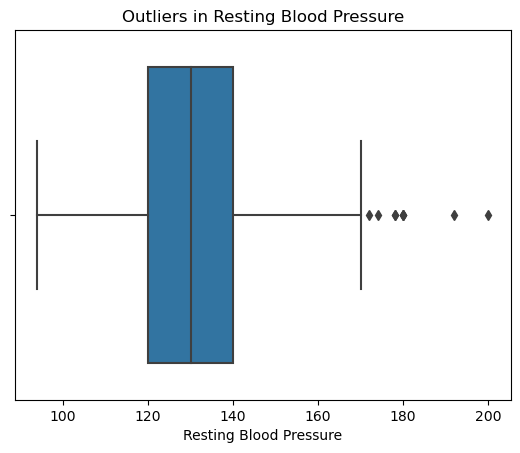

Data shape after outlier removal: (294, 14)


In [4]:
# Step 4: Outlier Treatment
print("\nOutlier Treatment:")
sns.boxplot(x=health_data['trestbps'])
plt.title('Outliers in Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure')
plt.savefig('images/outliers_trestbps.png')
plt.show()

Q1 = health_data['trestbps'].quantile(0.25)
Q3 = health_data['trestbps'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = health_data[(health_data['trestbps'] >= Q1 - 1.5 * IQR) & (health_data['trestbps'] <= Q3 + 1.5 * IQR)]
print(f"Data shape after outlier removal: {filtered_data.shape}")

In [5]:
# Step 5: Missing Value Treatment
print("\nMissing Value Treatment:")
print("Missing Values Before Treatment:")
print(health_data.isnull().sum())

health_data['ca'].fillna(health_data['ca'].median(), inplace=True)
health_data['thal'].fillna(health_data['thal'].median(), inplace=True)

print("Missing Values After Treatment:")
print(health_data.isnull().sum())


Missing Value Treatment:
Missing Values Before Treatment:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64
Missing Values After Treatment:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64



Variable Transformation:


C:\Users\khull\AppData\Local\Temp\ipykernel_26668\798395039.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(health_data['chol_log'], shade=True)


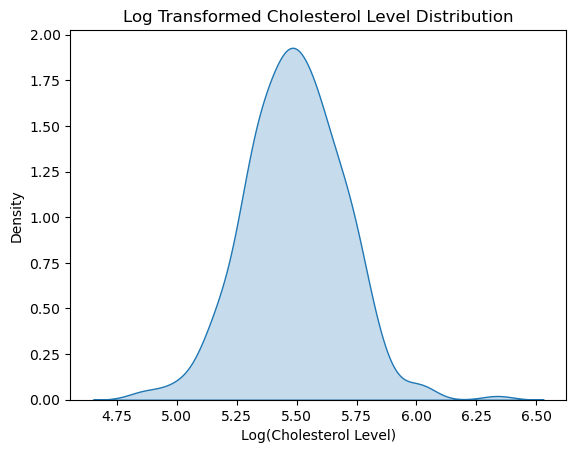

In [6]:
# Step 6: Variable Transformation
print("\nVariable Transformation:")
health_data['chol_log'] = np.log(health_data['chol'] + 1)

sns.kdeplot(health_data['chol_log'], shade=True)
plt.title('Log Transformed Cholesterol Level Distribution')
plt.xlabel('Log(Cholesterol Level)')
plt.ylabel('Density')
plt.savefig('images/chol_log_distribution.png')
plt.show()

In [7]:
# Step 7: Variable Creation
print("\nVariable Creation:")
health_data['senior'] = health_data['age'] >= 60

print(health_data[['age', 'senior']].head())


Variable Creation:
    age  senior
0  63.0    True
1  67.0    True
2  67.0    True
3  37.0   False
4  41.0   False


C:\Users\khull\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


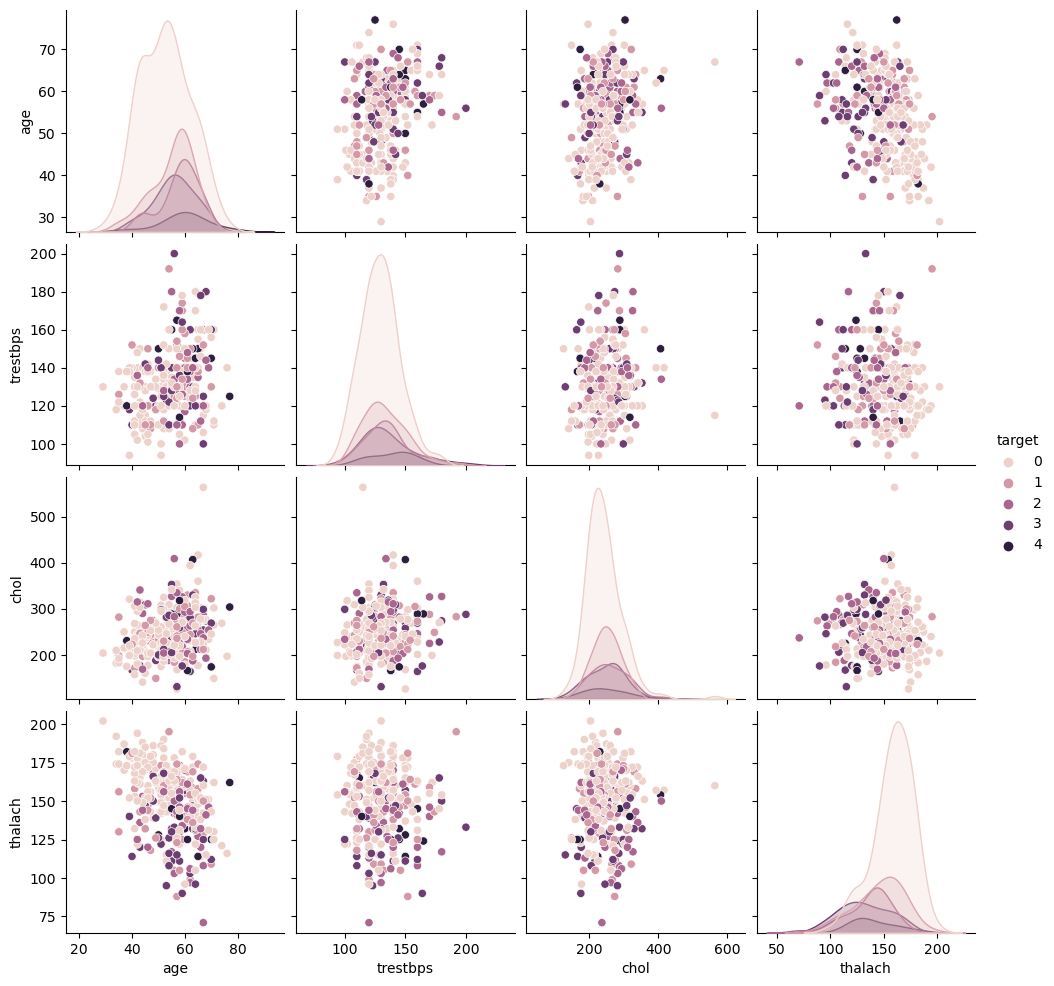

In [8]:
# Step 8: Pair Plots
sns.pairplot(health_data[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target')
plt.savefig('images/pairplot.png')
plt.show()

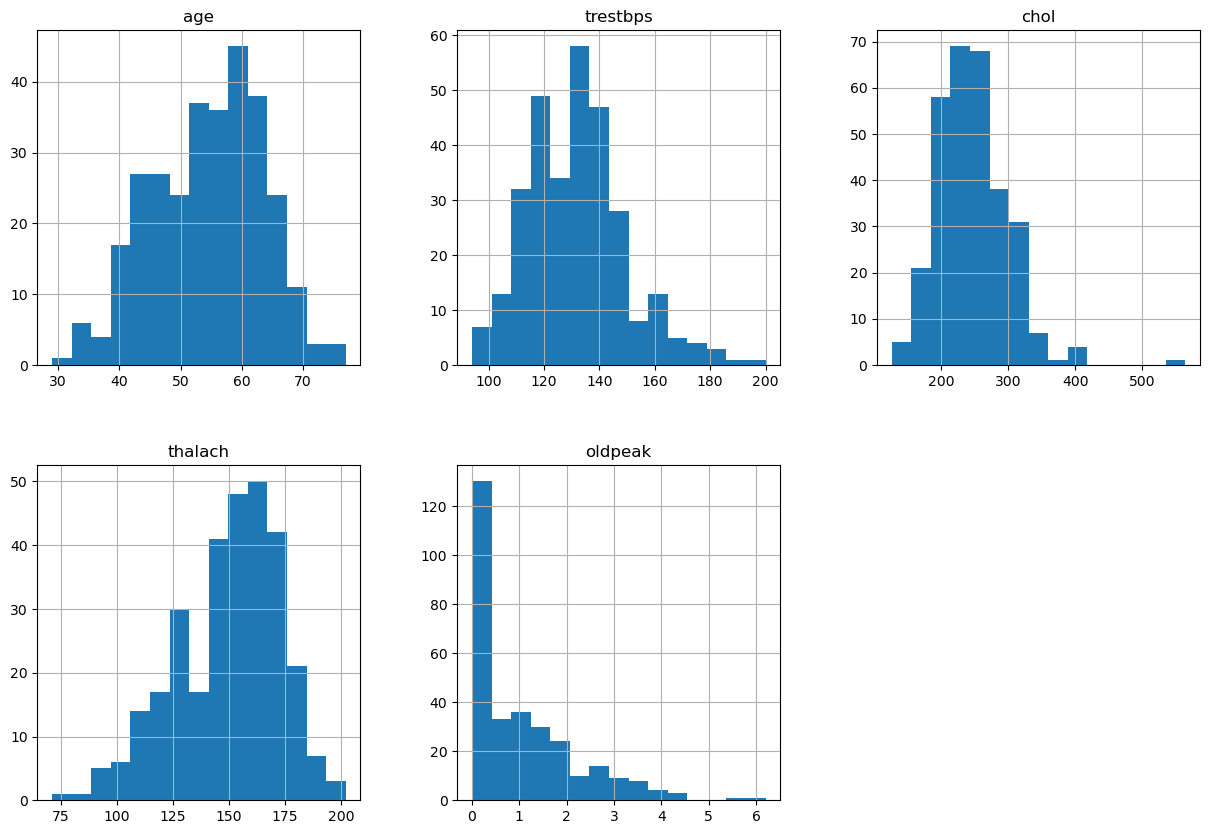

In [9]:
# Step 9: Feature Distributions
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
health_data[numerical_features].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.savefig('images/feature_distributions.png')
plt.show()

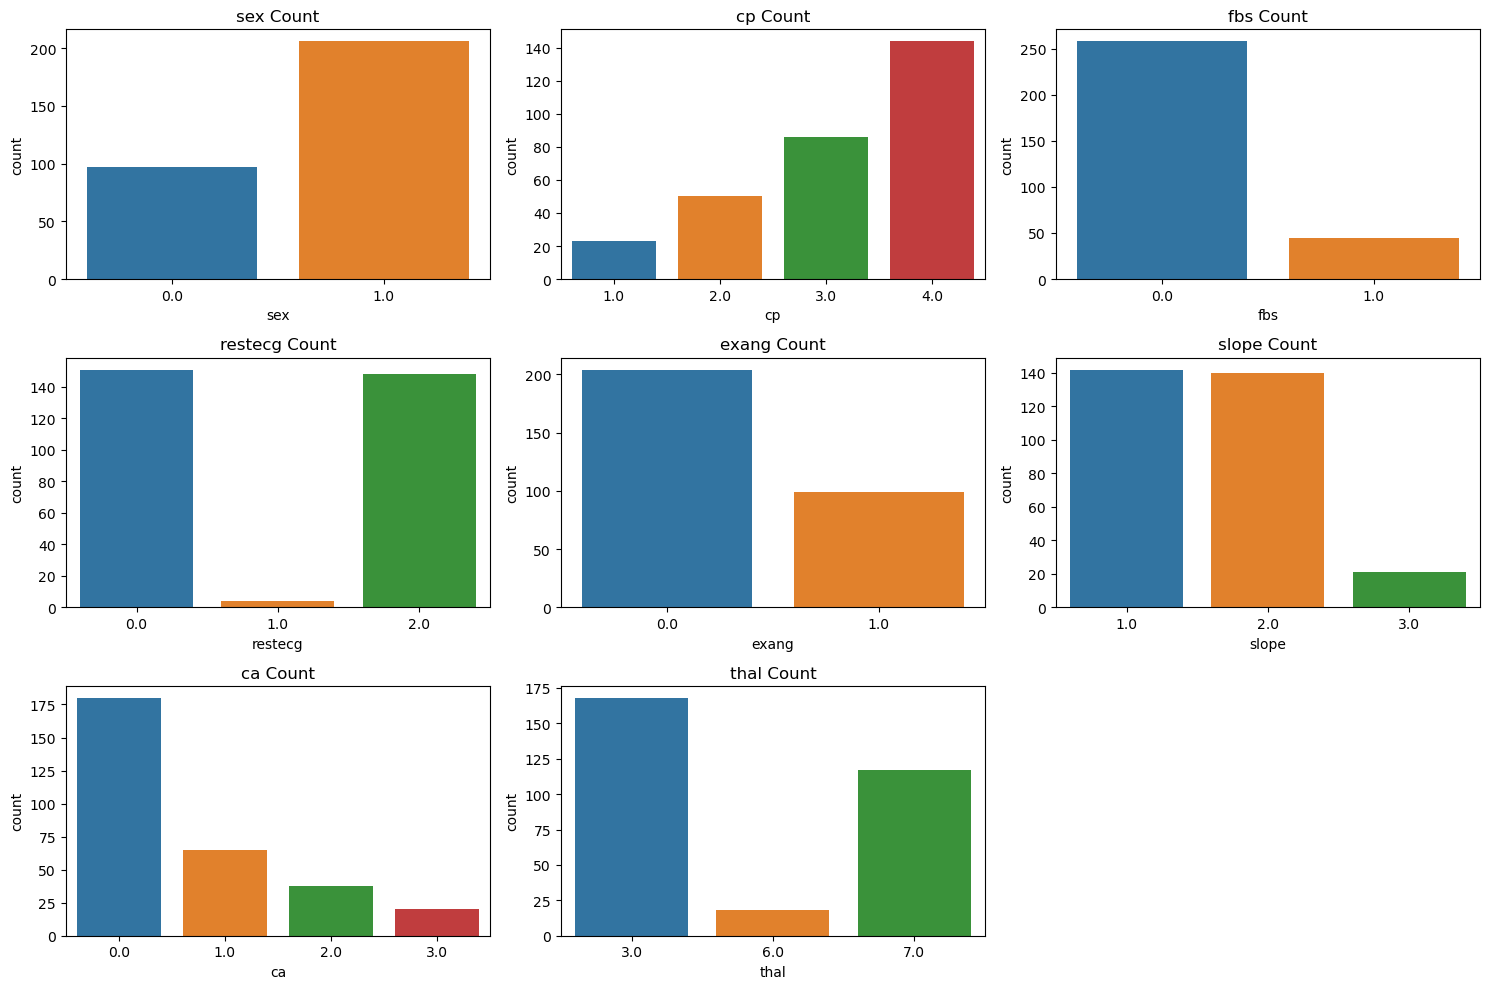

In [10]:
# Step 10: Categorical Feature Analysis
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=health_data, x=feature)
    plt.title(f'{feature} Count')
plt.tight_layout()
plt.savefig(f'images/{feature}_count.png')
plt.show()

In [11]:
# Step 11: Advanced Outlier Detection (Z-Score Method)
z_scores = zscore(health_data[numerical_features])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
health_data_no_outliers = health_data[filtered_entries]
print(f"Data shape after advanced outlier removal: {health_data_no_outliers.shape}")

Data shape after advanced outlier removal: (294, 16)


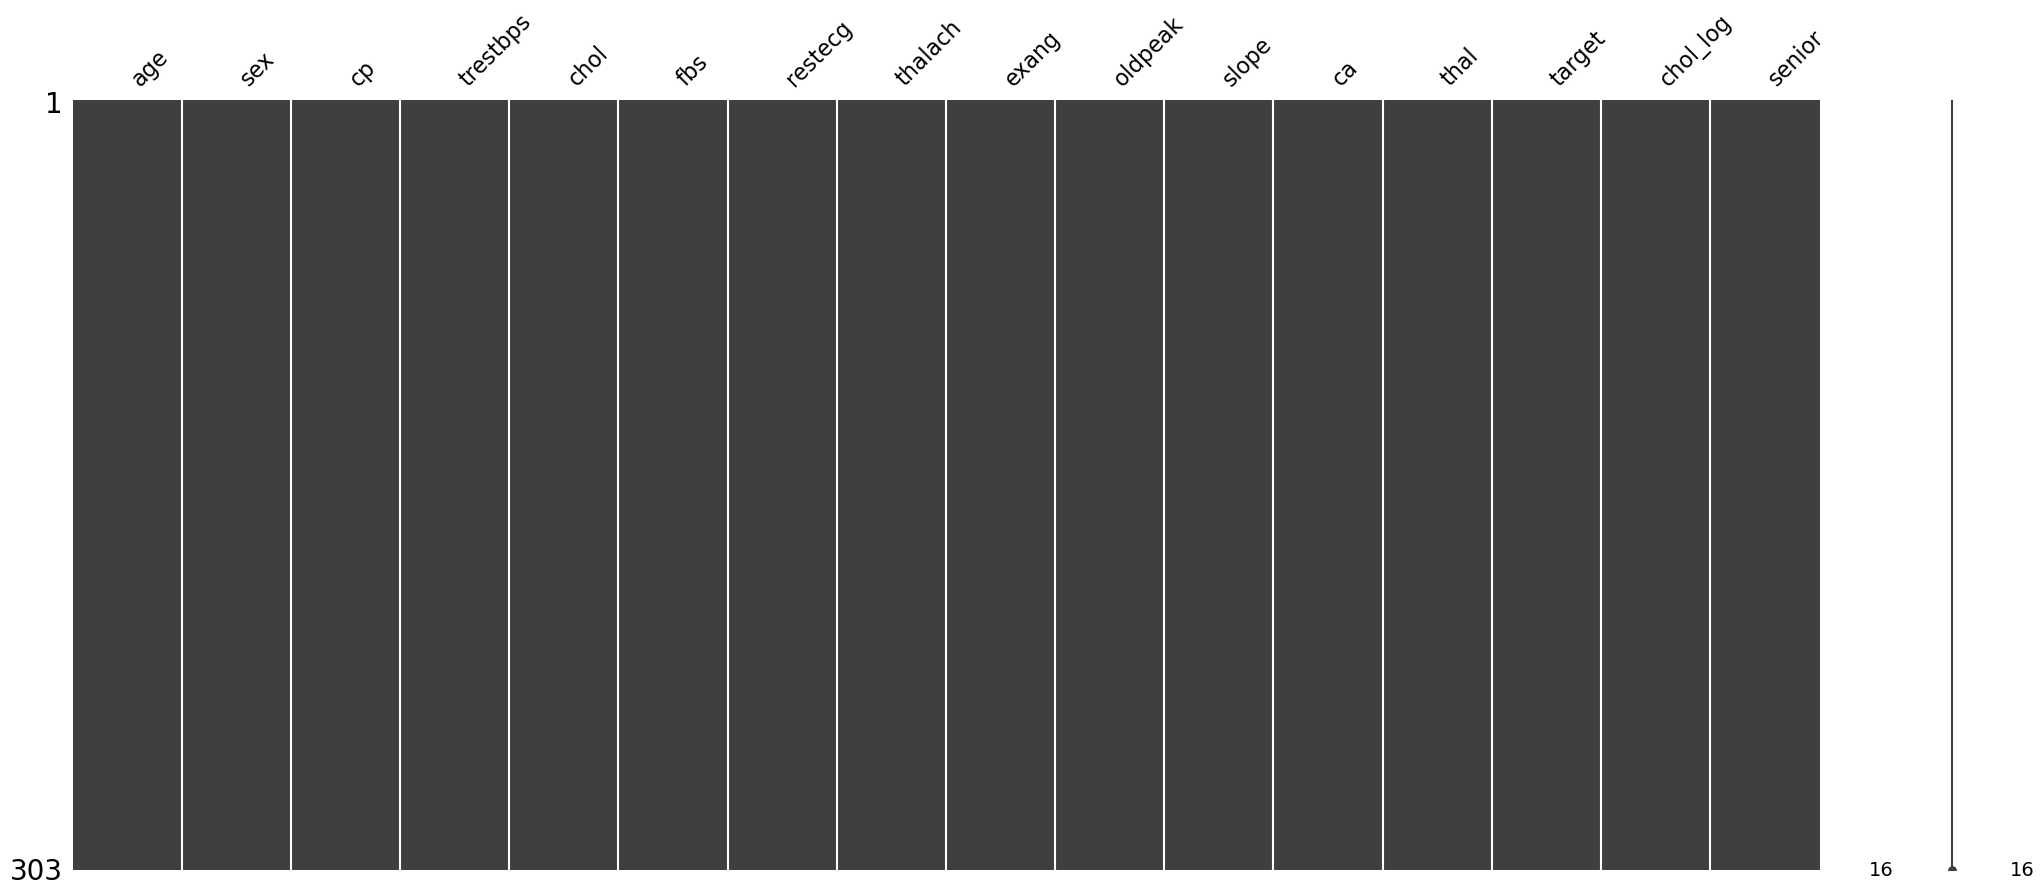

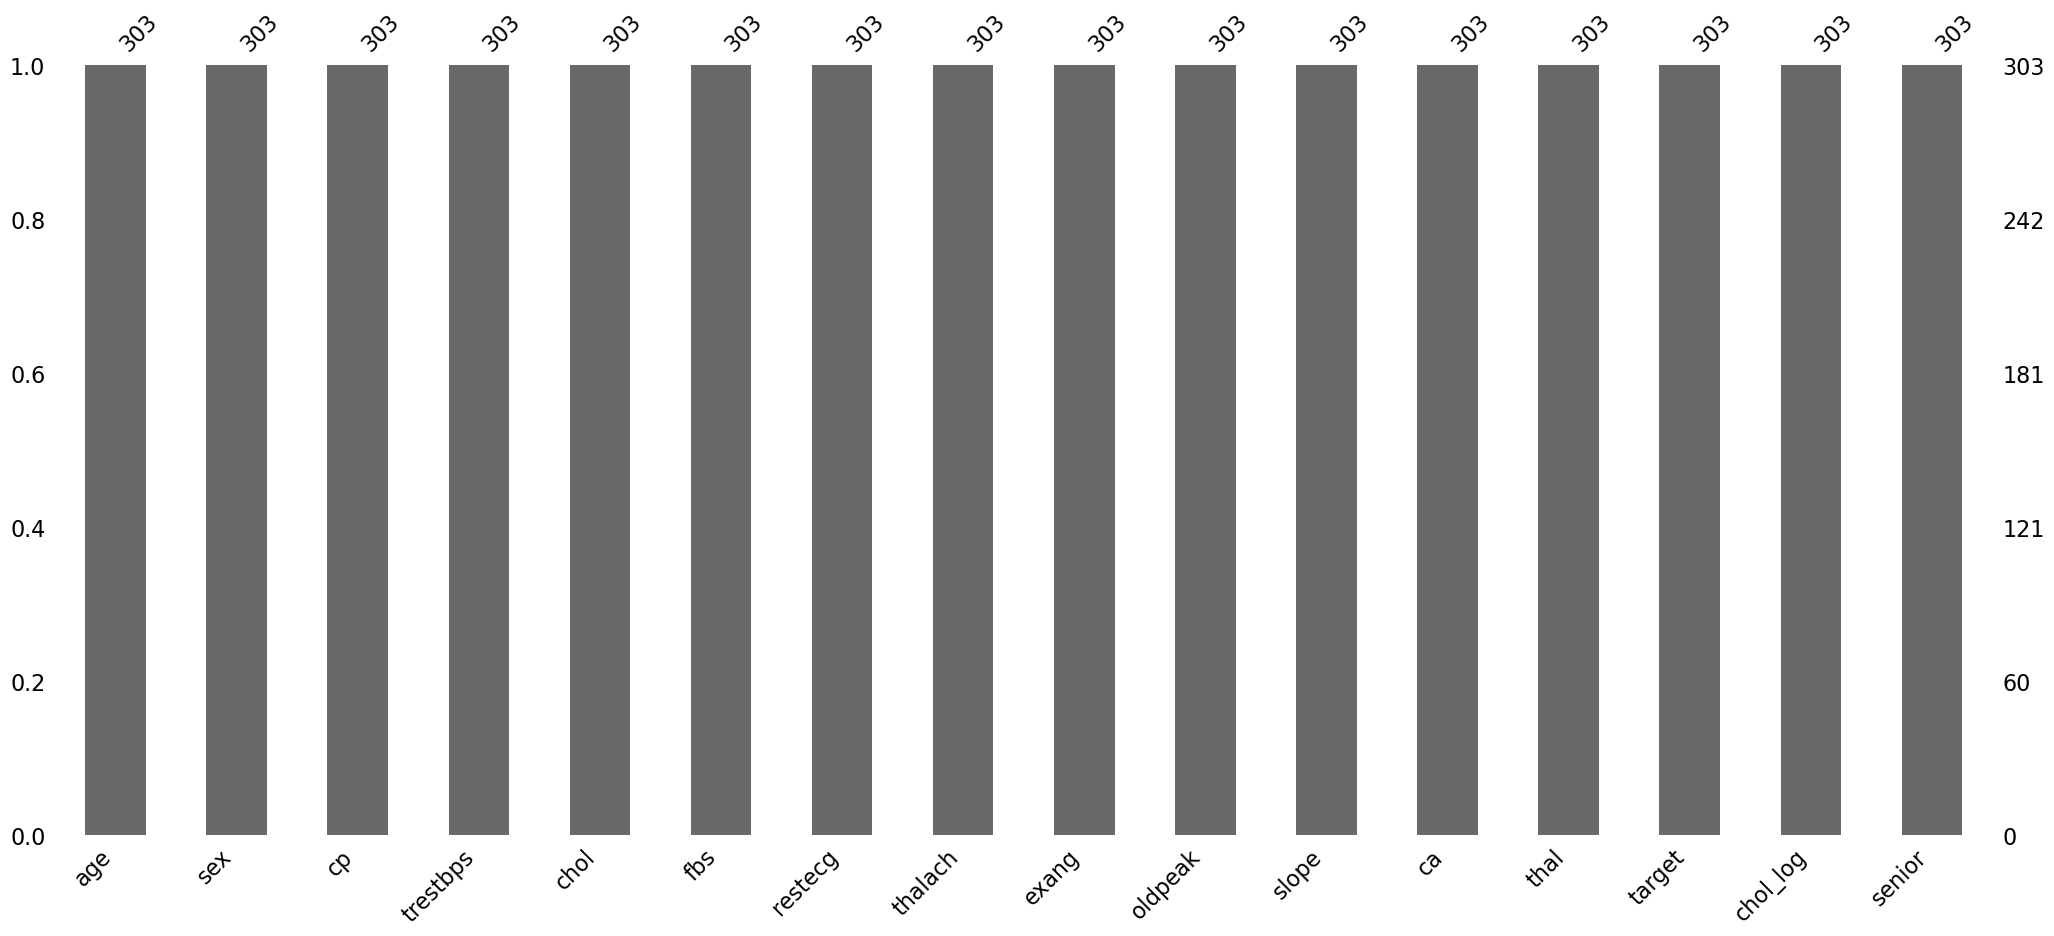

In [12]:
# Step 12: Missing Value Visualization
msno.matrix(health_data)
plt.savefig('images/missing_matrix.png')
plt.show()

msno.bar(health_data)
plt.savefig('images/missing_bar.png')
plt.show()

target      1.000000
ca          0.520968
thal        0.507155
oldpeak     0.504092
cp          0.407075
exang       0.397057
slope       0.377957
sex         0.224469
age         0.222853
restecg     0.183696
senior      0.162637
trestbps    0.157754
chol        0.070909
chol_log    0.067318
fbs         0.059186
thalach    -0.415040
Name: target, dtype: float64


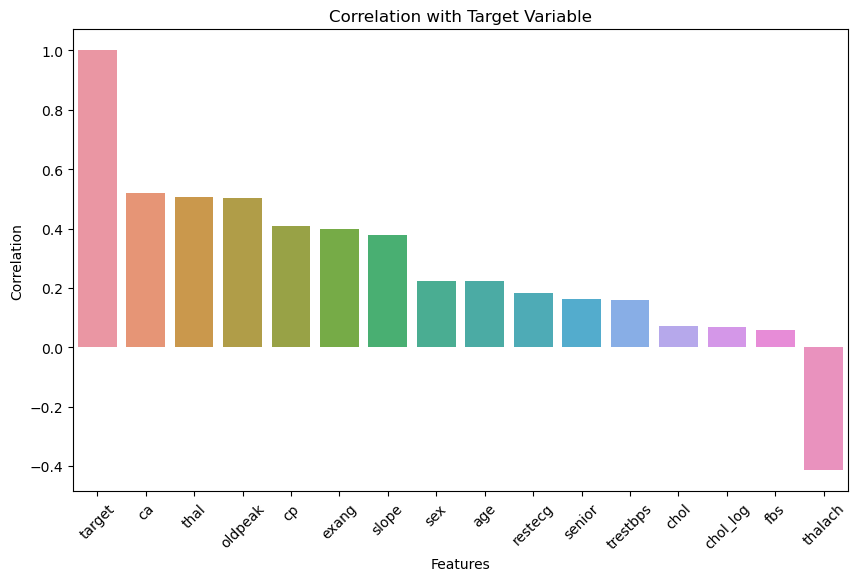

In [13]:
# Step 13: Correlation with Target Variable
target_corr = health_data.corr()['target'].sort_values(ascending=False)
print(target_corr)

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.savefig('images/correlation_with_target.png')
plt.show()

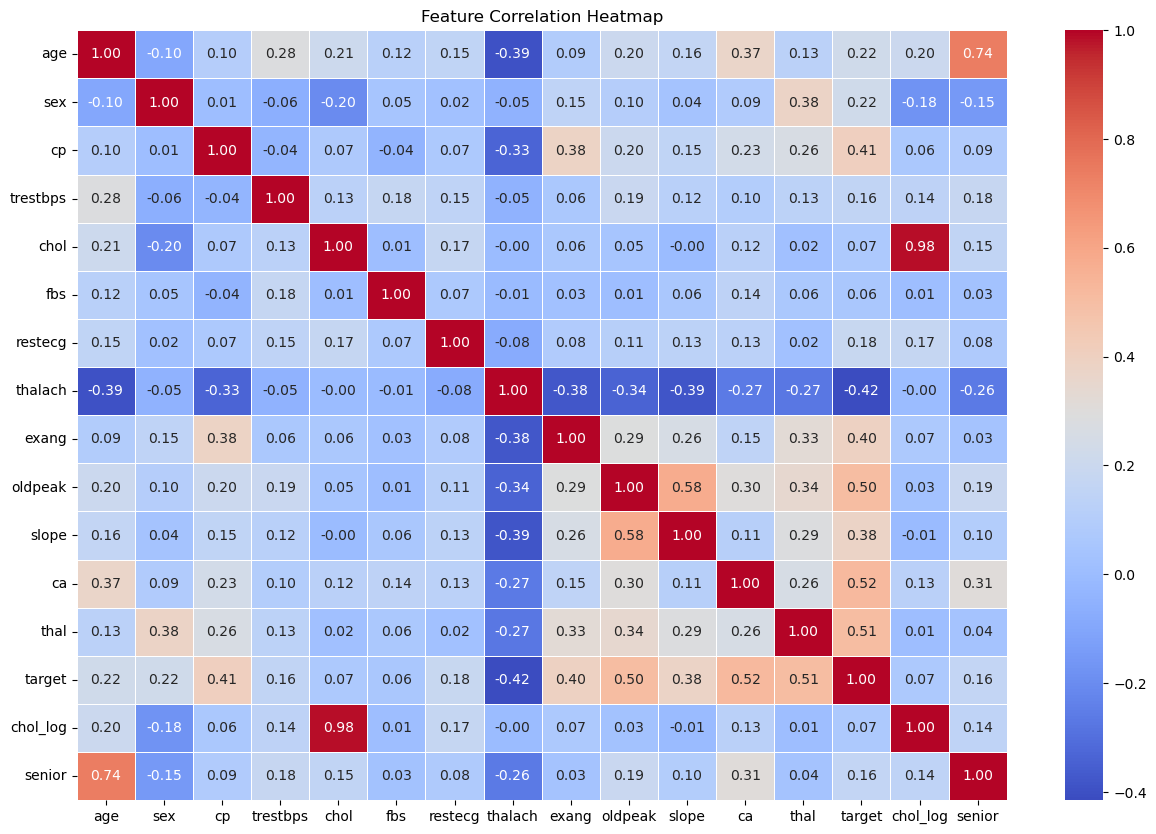

In [14]:
# Step 14: Heatmap of Feature Correlations
plt.figure(figsize=(15, 10))
sns.heatmap(health_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.savefig('images/feature_correlation_heatmap.png')
plt.show()